#**PART 1 : SUPERVISED LEARNING**

##**1. Load dataset**

In [ ]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

file_download = drive.CreateFile({'id':'1PfYIHtaUe3QxqTqCLGCBe99MpBRYtJME'})

file_download.GetContentFile('kidney_disease.csv')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


##**2. Rename the columns**

In [ ]:
 df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell',
                    'pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine',
                    'sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count',
                    'rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite',
                    'pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [ ]:
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


##**3. Logistic Regression and print confusion matrix to valide the model**

###**⚛ data cleaning**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
features_obj = []
for col in df.columns:
  if df[col].dtype == object:
    print(df.groupby(col)[col].count())
    print()
    features_obj.append(col)

red blood cells
abnormal     47
normal      201
Name: red blood cells, dtype: int64

pus cell
abnormal     76
normal      259
Name: pus cell, dtype: int64

pus cell clumps
notpresent    354
present        42
Name: pus cell clumps, dtype: int64

bacteria
notpresent    374
present        22
Name: bacteria, dtype: int64

packed cell volume
\t43     1
\t?      1
14       1
15       1
16       1
17       1
18       1
19       2
20       1
21       1
22       3
23       2
24       7
25       3
26       6
27       3
28      12
29       9
30       9
31       8
32      12
33      12
34      11
35       9
36      12
37      11
38       5
39       7
40      16
41      21
42      13
43      14
44      19
45      13
46       9
47       4
48      19
49       4
50      12
51       4
52      21
53       4
54       4
9        1
Name: packed cell volume, dtype: int64

white blood cell count
\t6200     1
\t8400     1
\t?        1
10200      5
10300      4
          ..
9500       5
9600       9
9700      

In [ ]:
# we will consider 'red blood cell count' columns as float
features_obj.remove('red blood cell count')

####**⚛⚛ Replace object value by numerical value**


In [ ]:
# to replace 'normal' by 1 and 'abnormal' by 0 for all values
df.replace(['normal', 'abnormal'], [1, 0], inplace=True)

In [ ]:
# to replace 'present' by 1 and 'notpresent' by 0 for all values
df.replace(['present', 'notpresent'], [1, 0], inplace=True)

In [ ]:
# to replace 'no' or'\tno' by 0 AND 'yes' or '\tyes' by 1
df.replace({'no':0, '\tno':0, 'yes':1, '\tyes':1, ' yes':1}, inplace=True)

In [ ]:
# to replace 'good' by 1 AND 'poor' by 0
df.replace(['good', 'poor'], [1, 0], inplace=True)

In [ ]:
# to replace 'ckd' or 'ckd\t' by 1 AND 'notckd' by 0
df.replace(['ckd', 'ckd\t', 'notckd'], [1, 1, 0], inplace=True)

In [ ]:
# to replace '\t?' and '?' to np.nan
df.replace(['\t?','?'], [np.nan, np.nan], inplace=True)

In [ ]:
# remove '\t' and set the type of column as float. eg: \t6200 -> 6200
for col in df.columns:
  if df[col].dtype==object:
    df[col] = df[col].str.removeprefix('\t')
    df[col] = df[col].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    float64
 7   pus cell                 335 non-null    float64
 8   pus cell clumps          396 non-null    float64
 9   bacteria                 396 non-null    float64
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


####**⚛⚛ Fill nan value**

In [ ]:
print(features_obj)

['red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'packed cell volume', 'white blood cell count', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'class']


In [ ]:
# fill nan value in class column
for i in features_obj:
  df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
# fill nan value in float column
for i in df.columns:
  df[i].fillna(df[i].mean(), inplace=True)

In [ ]:
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red blood cells          400 non-null    float64
 7   pus cell                 400 non-null    float64
 8   pus cell clumps          400 non-null    float64
 9   bacteria                 400 non-null    float64
 10  blood glucose random     400 non-null    float64
 11  blood urea               400 non-null    float64
 12  serum creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [ ]:
df.corr()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
id,1.000000,-0.184043,-0.243732,0.613623,-0.520040,-0.271330,0.231457,0.335825,-0.264142,-0.115955,...,0.552960,-0.245216,0.515032,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.273096,-0.838528
age,-0.184043,1.000000,0.148004,-0.180570,0.114764,0.207857,-0.011783,-0.101951,0.159074,0.043573,...,-0.208361,0.116554,-0.201051,0.393440,0.363475,0.232951,-0.157741,0.094434,0.050567,0.225405
blood_pressure,-0.243732,0.148004,1.000000,-0.182463,0.146593,0.200784,-0.151369,-0.156856,0.059560,0.112173,...,-0.286473,0.039957,-0.220822,0.270447,0.228250,0.086618,-0.177601,0.054083,0.194962,0.290600
specific gravity,0.613623,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,0.236228,0.345325,-0.290663,-0.220792,...,0.514976,-0.243869,0.466976,-0.366959,-0.393190,-0.154803,0.246822,-0.272476,-0.213276,-0.698957
albumin,-0.520040,0.114764,0.146593,-0.466698,1.000000,0.268070,-0.373927,-0.535157,0.399749,0.367855,...,-0.516971,0.223967,-0.454886,0.481724,0.378042,0.236745,-0.330562,0.440893,0.282305,0.599238
sugar,-0.271330,0.207857,0.200784,-0.287993,0.268070,1.000000,-0.074324,-0.168826,0.151445,0.107684,...,-0.198128,0.165610,-0.182278,0.293179,0.472330,0.246702,-0.080648,0.130721,0.066348,0.327812
red blood cells,0.231457,-0.011783,-0.151369,0.236228,-0.373927,-0.074324,1.000000,0.377394,-0.102948,-0.184402,...,0.278263,-0.021104,0.202455,-0.140538,-0.145646,-0.111493,0.160868,-0.199285,-0.107625,-0.282642
pus cell,0.335825,-0.101951,-0.156856,0.345325,-0.535157,-0.168826,0.377394,1.000000,-0.520118,-0.330401,...,0.417339,-0.107753,0.383240,-0.291719,-0.201032,-0.172295,0.274985,-0.350227,-0.260566,-0.375154
pus cell clumps,-0.264142,0.159074,0.059560,-0.290663,0.399749,0.151445,-0.102948,-0.520118,1.000000,0.275082,...,-0.297980,0.158224,-0.267982,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
bacteria,-0.115955,0.043573,0.112173,-0.220792,0.367855,0.107684,-0.184402,-0.330401,0.275082,1.000000,...,-0.188624,0.095702,-0.192222,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871


###**logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression # import the function
from sklearn.metrics import *

In [ ]:
# define features and target
features = [i for i in df.columns if i not in ['id', 'class']]
target = 'class'

In [ ]:
x = df[features]
y = df[target]

In [ ]:
logReg = LogisticRegression()
logReg.fit(x, y)
y_pred = logReg.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
conf_matrx = confusion_matrix(y, y_pred)
conf_matrx # tn=131, fp=19, fn=20, tp=230. We can consider that the model are not so bad (pretty good)

array([[131,  19],
       [ 20, 230]])

##**4. Apply KNN and choose the optimal number of neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n_neighbors = [2, 3, 4, 5, 6, 7, 8, 9]
list_score = []

In [ ]:
for k in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x, y)
  y_pred = knn.predict(x)
  score_accur = accuracy_score(y_pred, y)
  list_score.append(score_accur)

In [ ]:
print('the scores : ',list_score)
idx = list_score.index(max(list_score))
best_k = n_neighbors[idx]
print('The optimal number of neighbor is :',best_k, '.With a score =',max(list_score))

the scores :  [0.8575, 0.915, 0.82, 0.8425, 0.7825, 0.795, 0.7625, 0.7775]
The optimal number of neighbor is : 3 .With a score = 0.915


##**5. Apply decision Tree and plot it and calculate accuracy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x, y)
y_pred = dec_tree.predict(x)

#### plot the graph

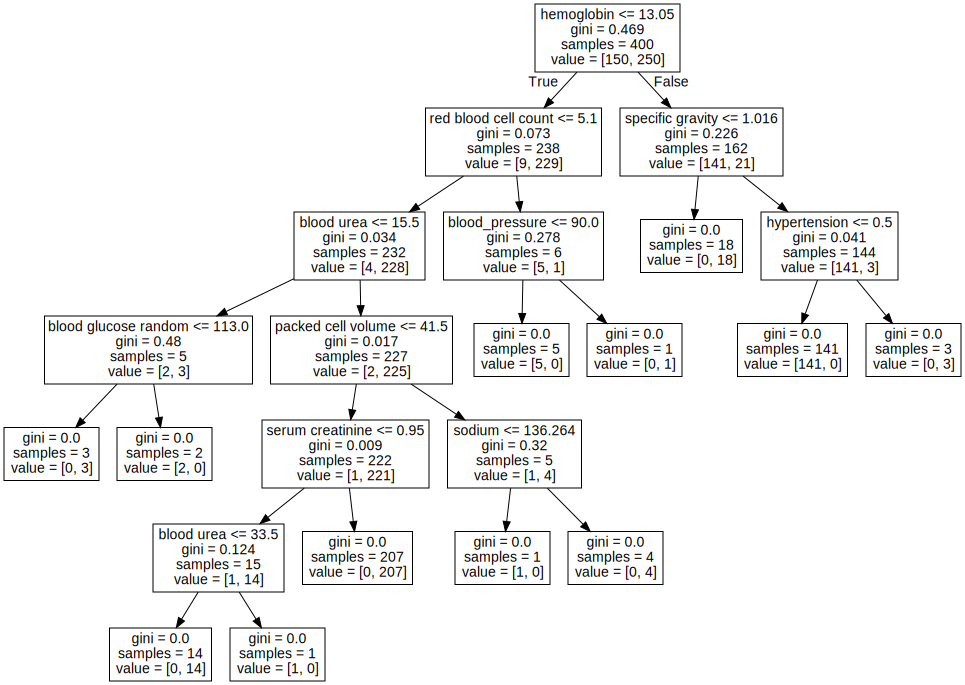

In [ ]:
dot_data = export_graphviz(dec_tree, feature_names=features)
graph = graphviz.Source(dot_data)
graph.render('plot_tree.pdf')
graph

### calculate accuracy

In [ ]:
score_accur = accuracy_score(y_pred, y)
print('accuracy score is', score_accur)

accuracy score is 1.0


##**6. Apply random forest, calculate and compare the accuracy with previous result**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_forest = RandomForestClassifier()
rand_forest.fit(x, y)
y_pred = rand_forest.predict(x)

In [ ]:
# calculate the accuracy score
score_accur = accuracy_score(y_pred, y)
print('the accuracy score is', score_accur)

the accuracy score is 1.0


###**▶ conclusion**
The score of decision tree is 1.0 AND the score of random forest is also 1.0, so the two

#**PART 2 : UNSUPERVISED LEARNING**

##**1. Drop out the target variable**

In [ ]:
df2 = df.drop('class', axis=1)
df2

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,15.7,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,16.5,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,15.8,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,14.2,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0


##**2. Use hierarchical clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agglom = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels = agglom.fit_predict(x)
clust_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##**3. Plot the cluster**

In [ ]:
import matplotlib.pyplot as plt

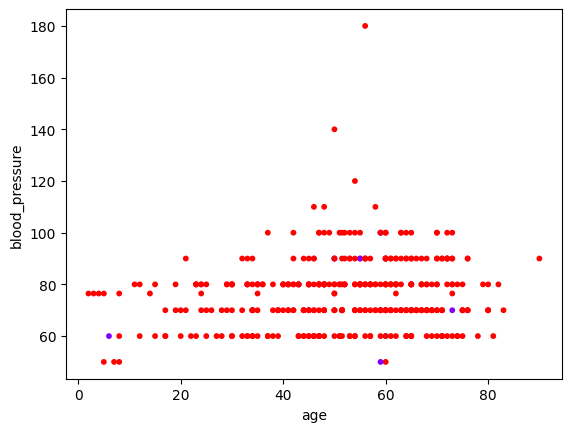

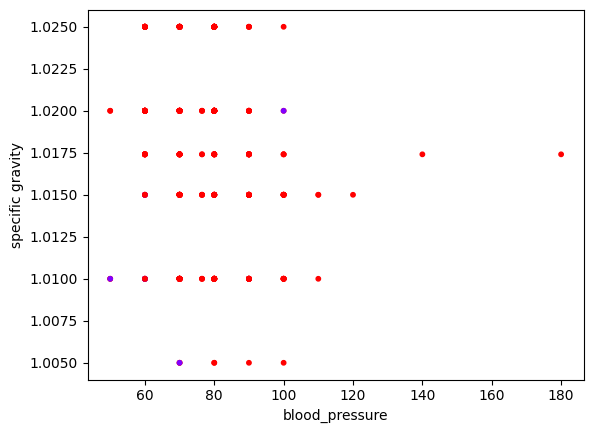

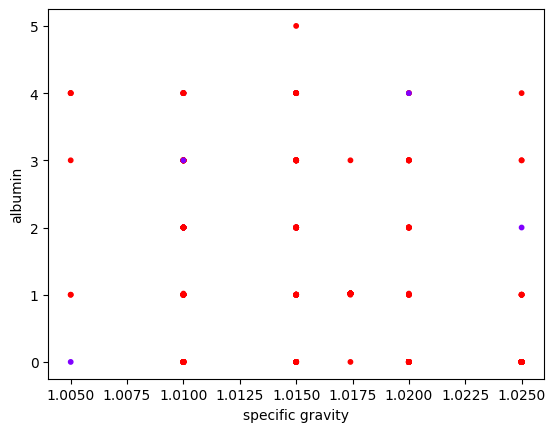

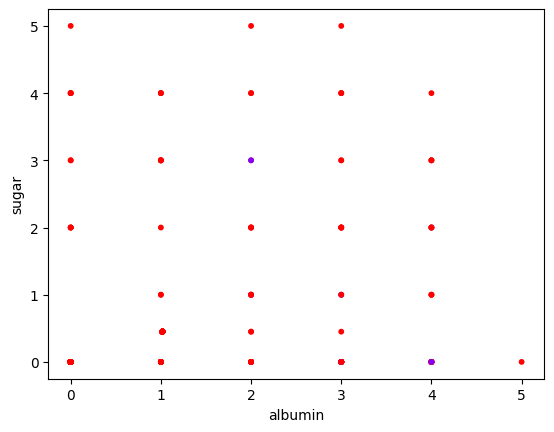

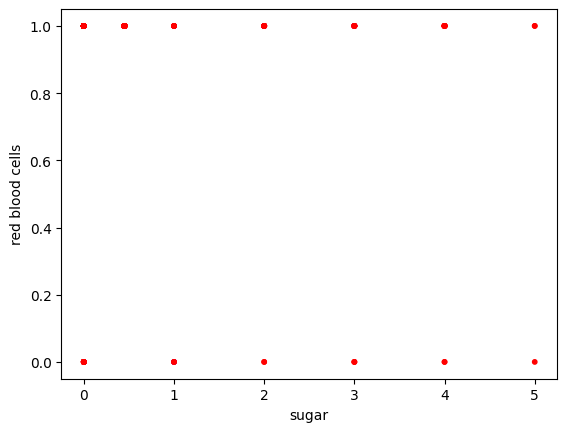

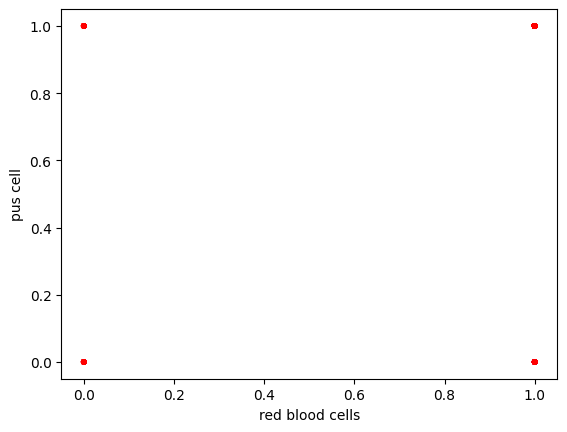

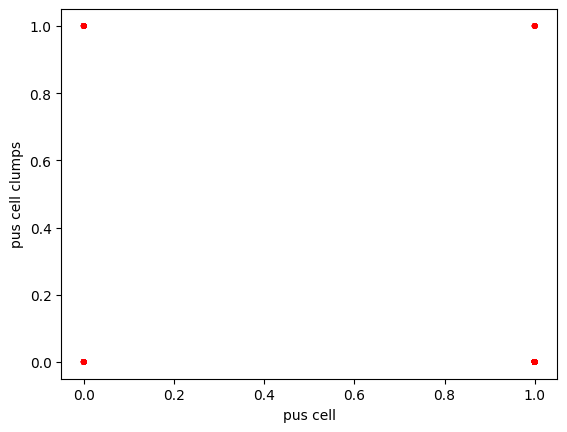

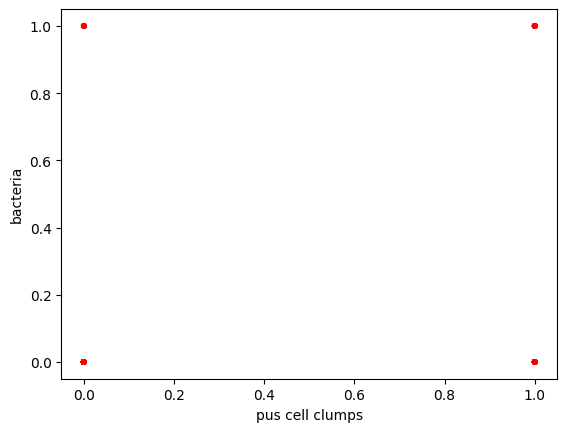

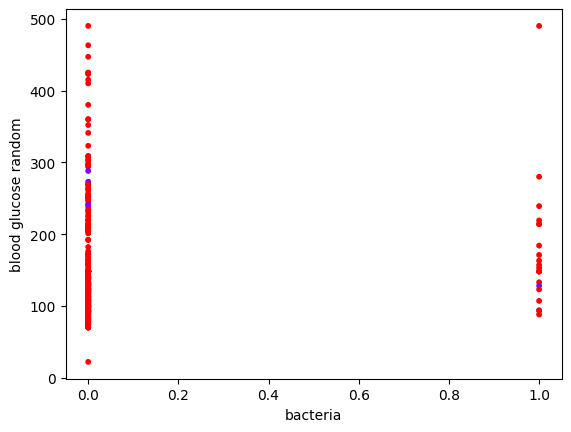

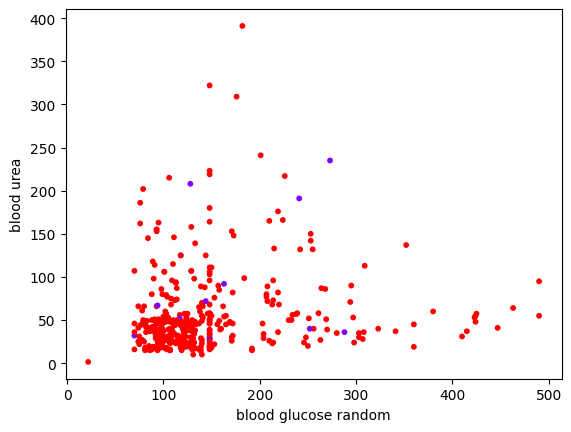

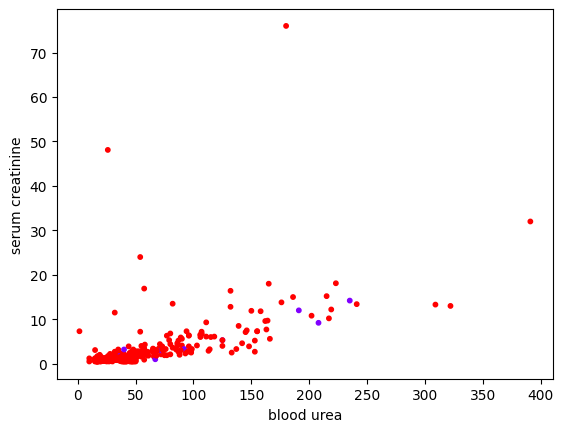

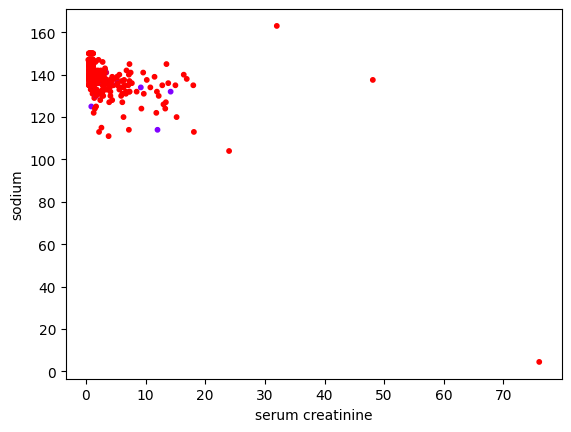

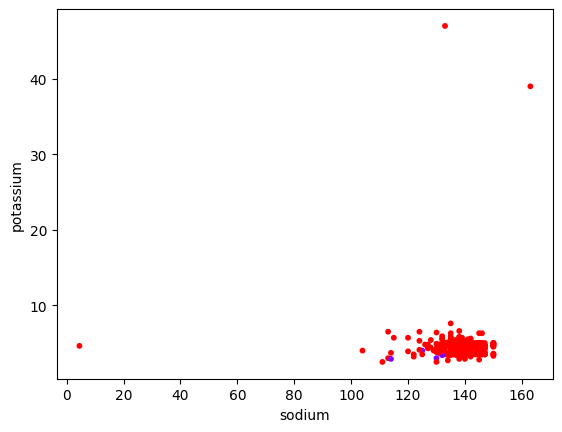

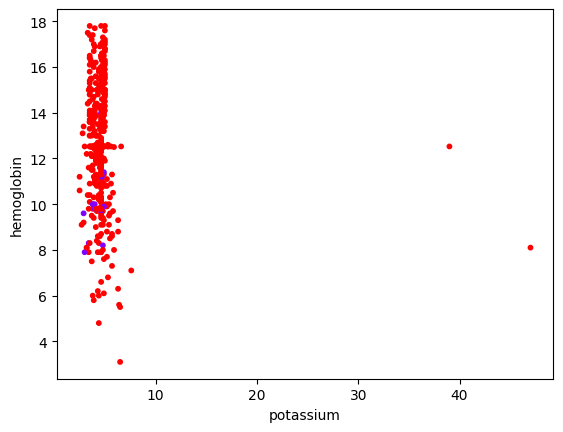

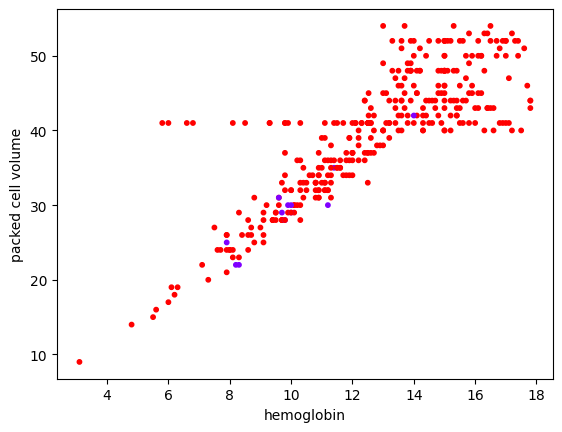

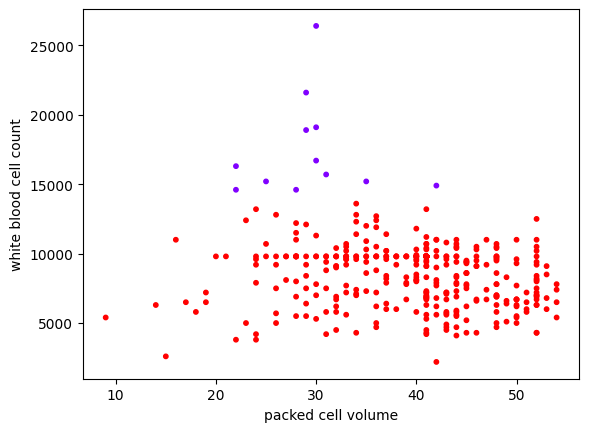

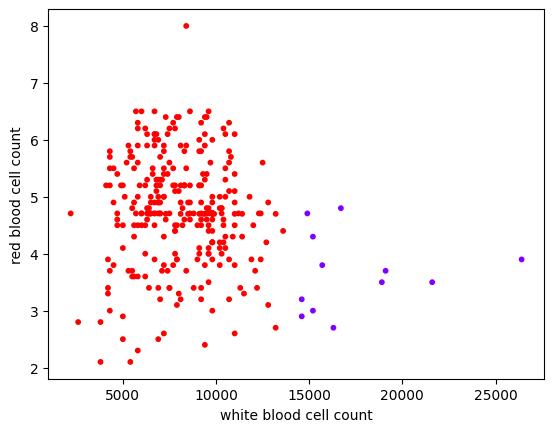

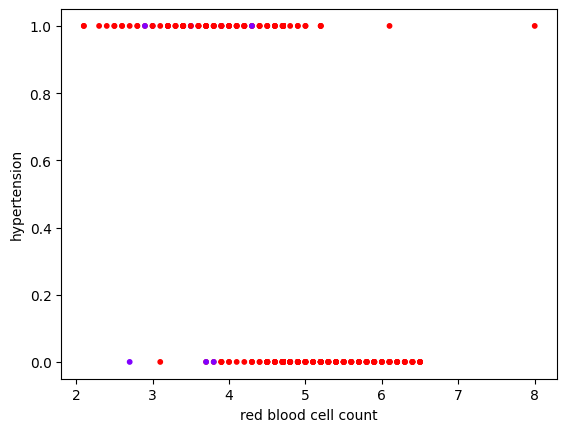

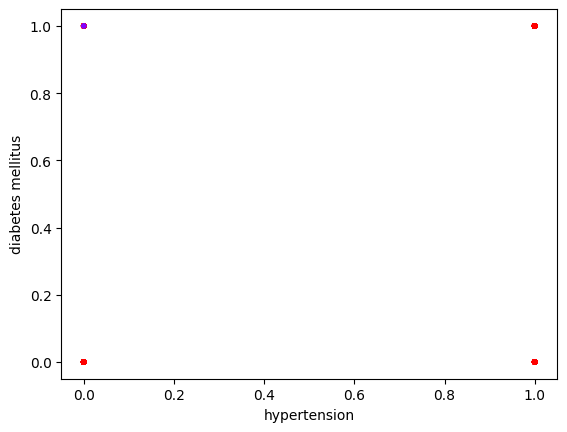

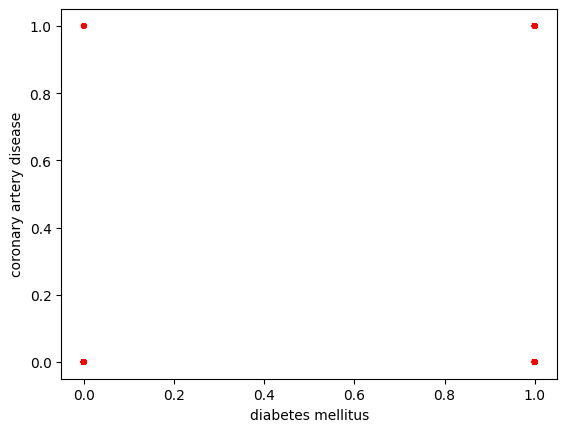

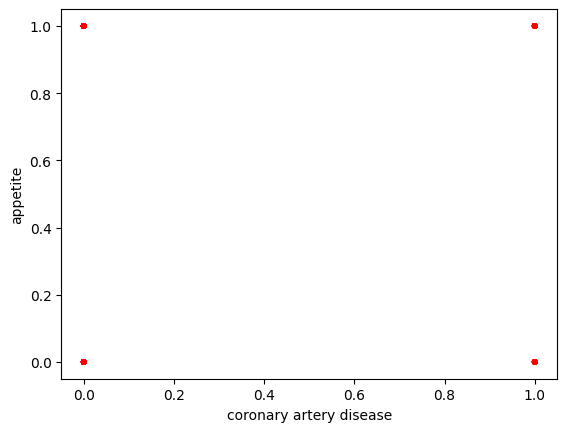

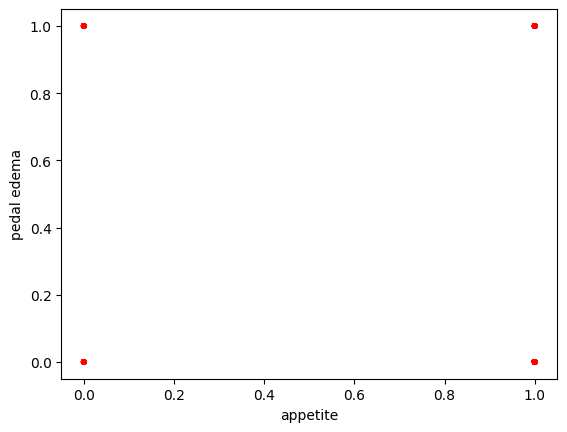

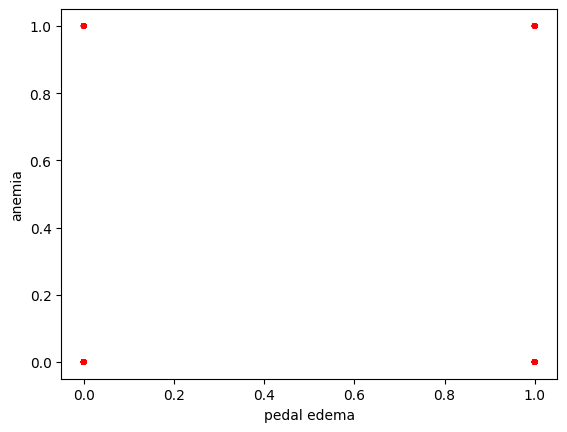

In [ ]:
i = 0
while features[i] != features[-1]:
  j = i+1
  plt.scatter(x[features[i]], x[features[j]], c=clust_labels, s=10, cmap='rainbow')
  plt.xlabel(features[i])
  plt.ylabel(features[j])
  plt.show()
  print()
  i = i+1

##**4. Plot the dendrogram and use k-mean to choose the optimal k**

###**4.1 Plot the dendrogram**

In [ ]:
import scipy.cluster.hierarchy as sch

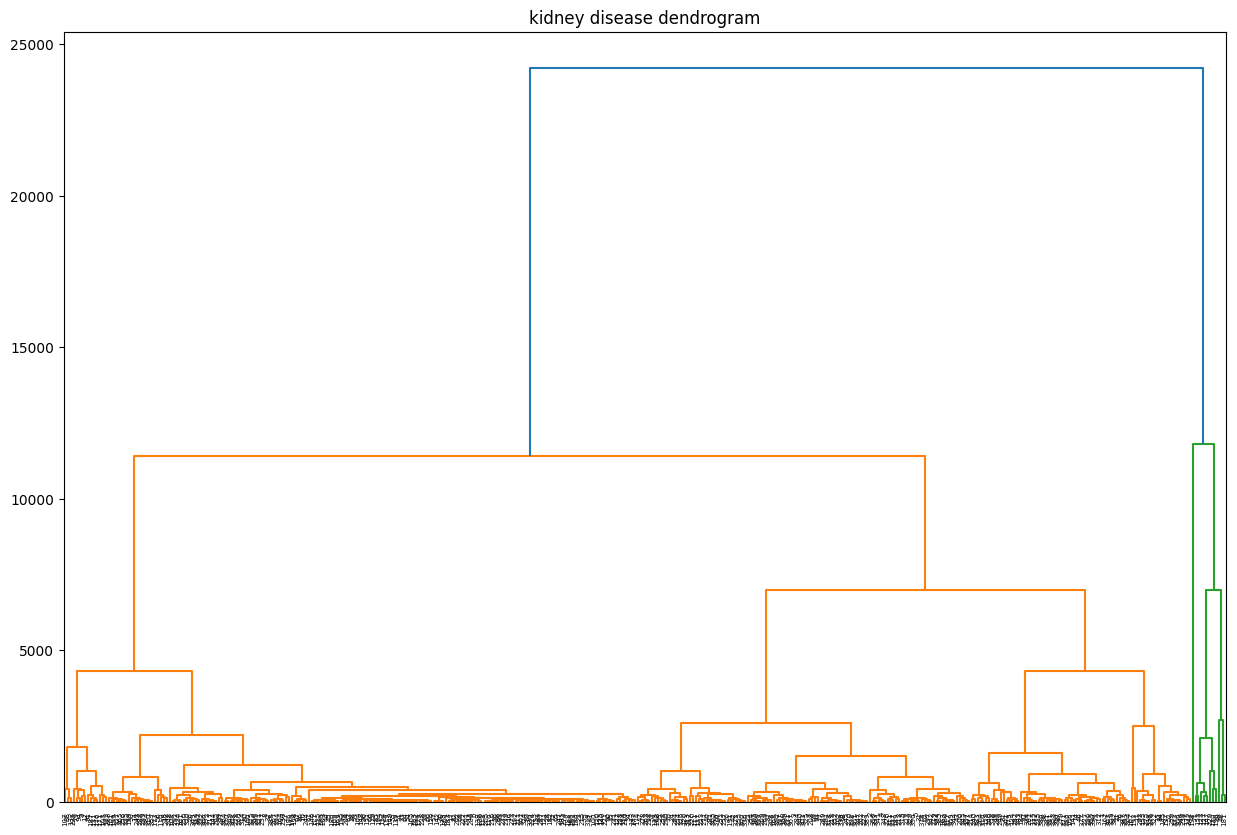

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('kidney disease dendrogram')
dend = sch.dendrogram(sch.linkage(x, method='complete'))

###**4.2 Use k-mean**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
list_kcentroid = [2, 3, 4, 5, 6, 7, 8, 9]
list_inertia = []

In [ ]:
for k in list_kcentroid:
  kmean = KMeans(n_clusters=k)
  kmean.fit_predict(x)
  list_inertia.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

inertia values : [1201294986.0260587, 562429883.8154669, 388083892.84169185, 232786109.44709608, 175412280.95858455, 131166169.12613562, 104229490.11368062, 78655995.88322675]


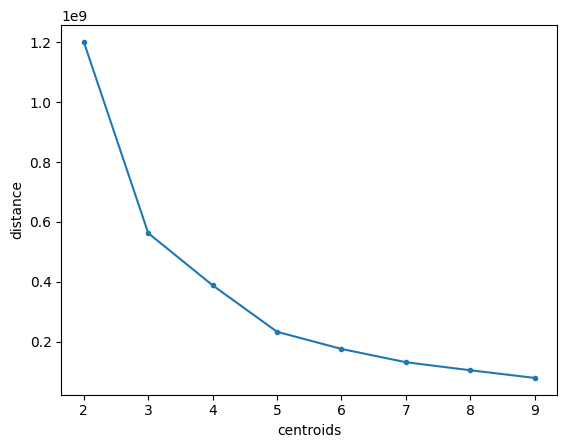

In [ ]:
print('inertia values :', list_inertia)

# now we will plot the elbow method
plt.plot(list_kcentroid, list_inertia, '.-')
plt.xlabel('centroids')
plt.ylabel('distance')
plt.show()

###**▶ Conclusion**
we choose the k=3 as the optimal k

##**5. Plot the cluster**

In [ ]:
best_kmean = KMeans(n_clusters=3)
best_kmean.fit(x, y)
labels = best_kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


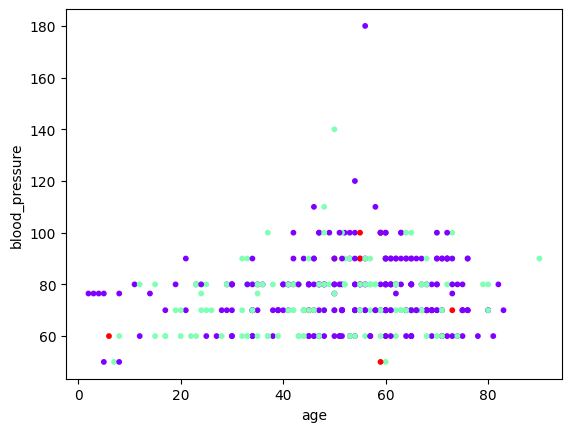

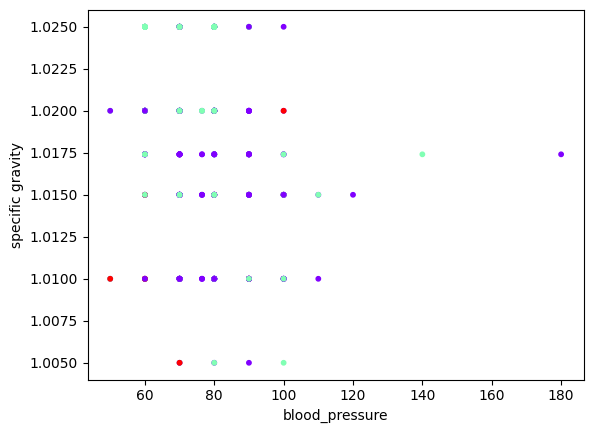

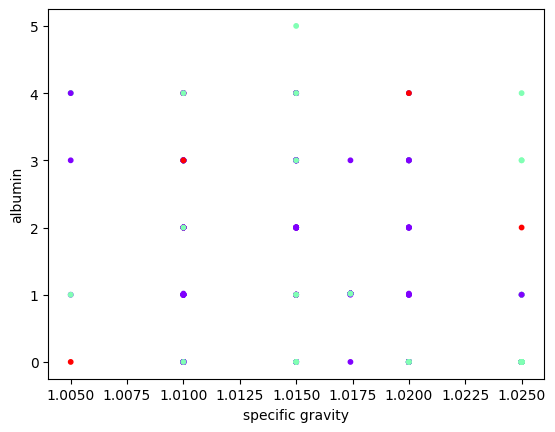

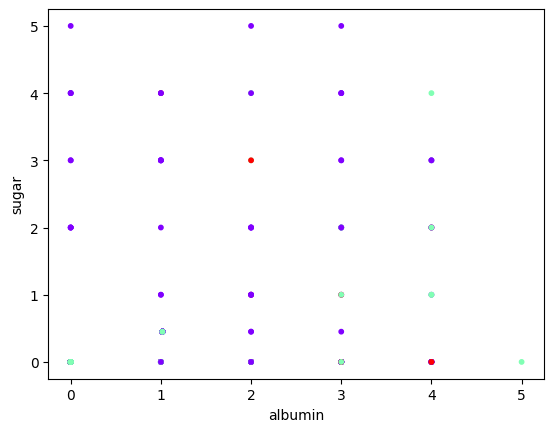

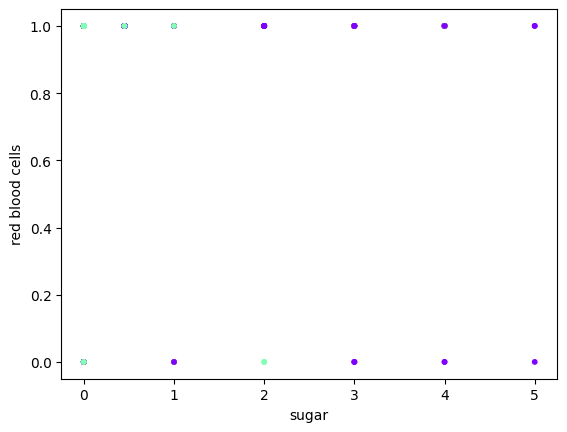

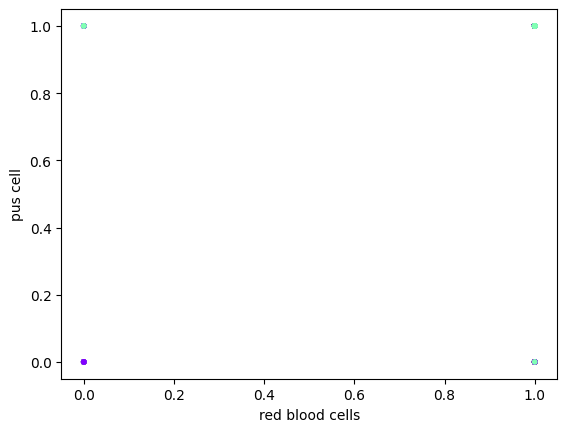

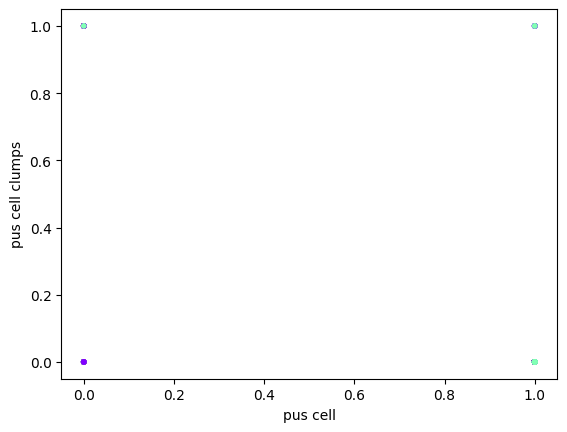

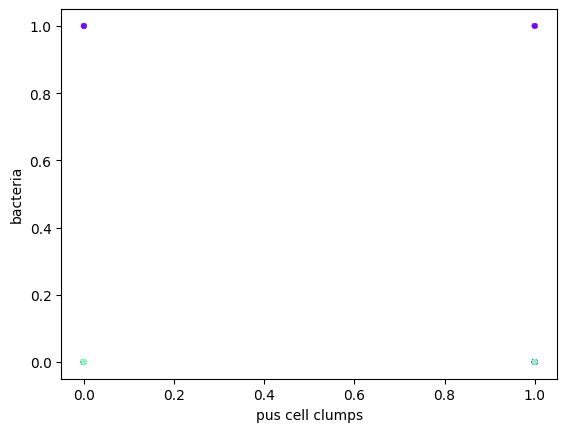

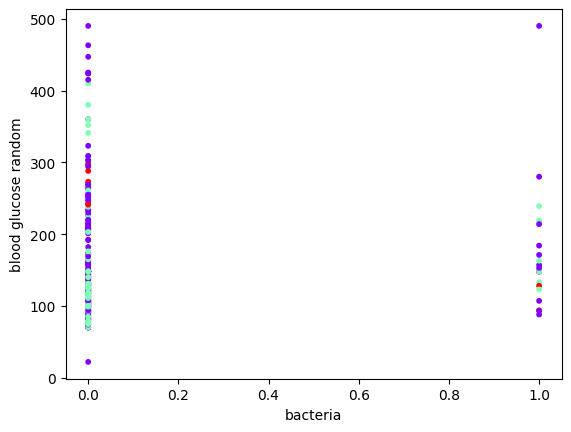

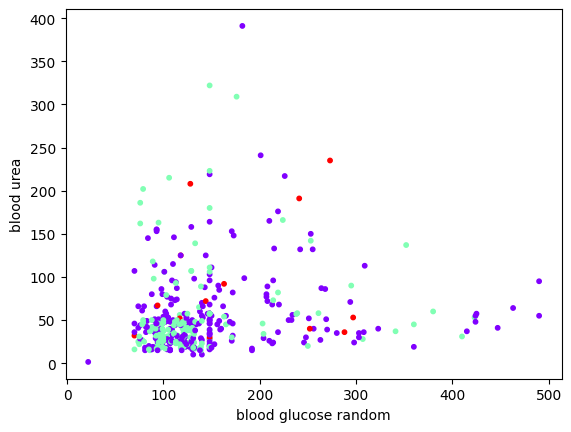

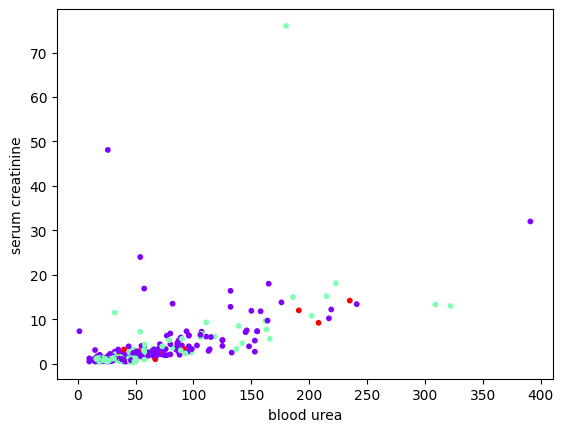

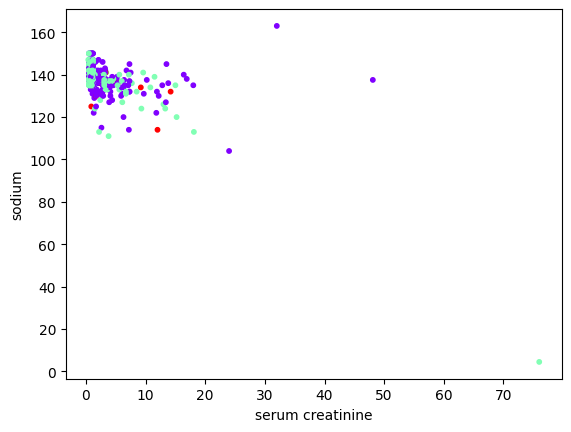

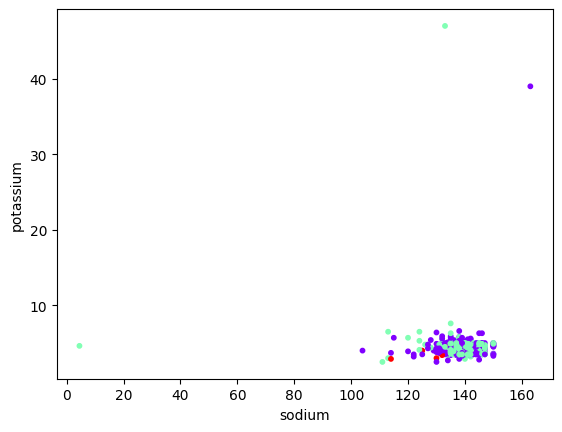

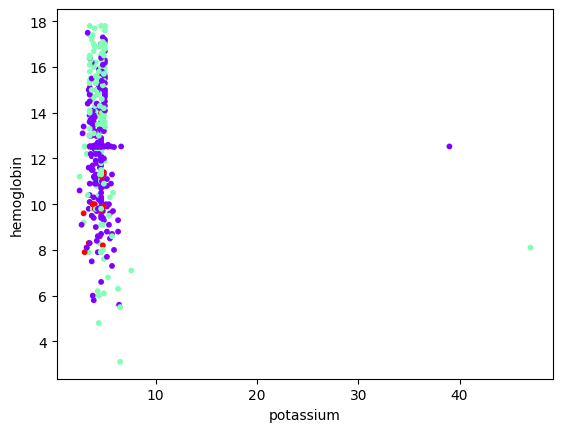

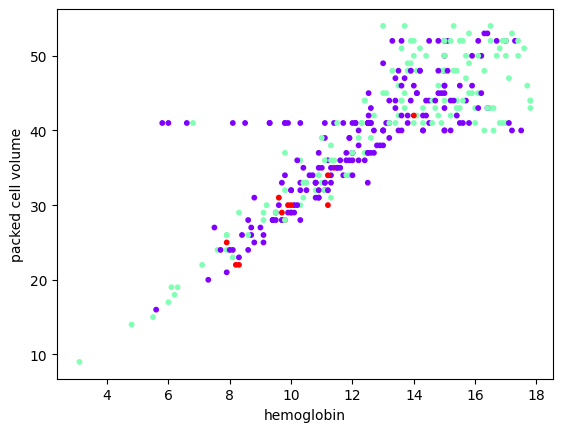

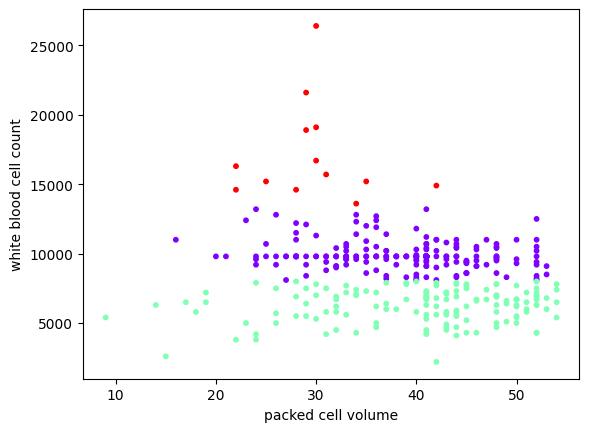

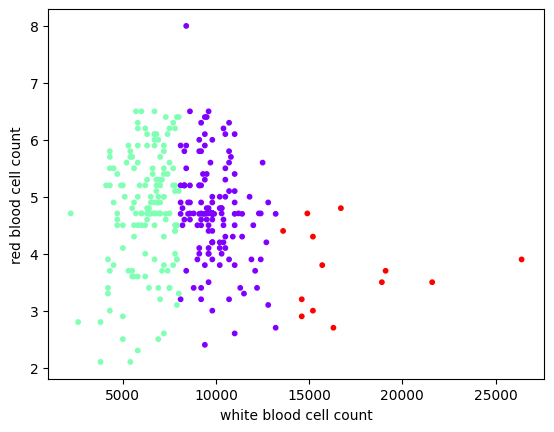

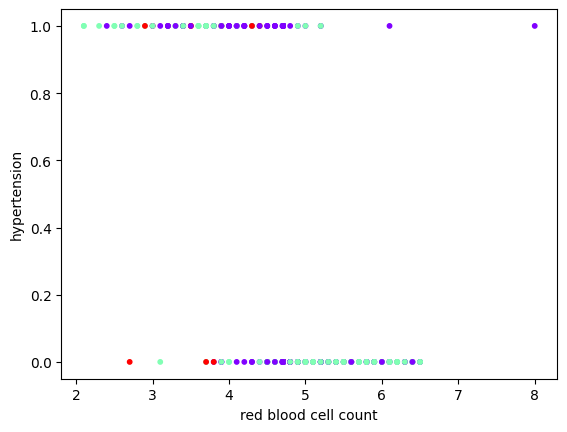

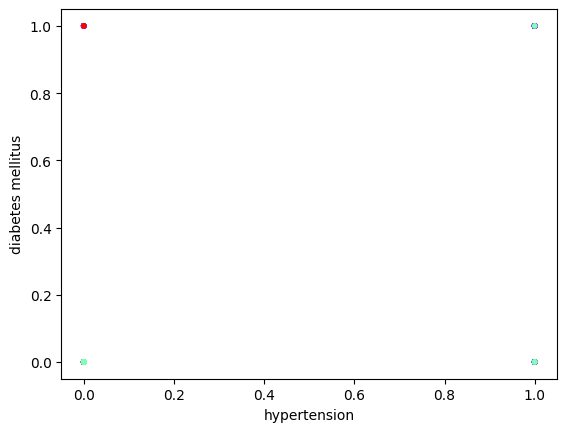

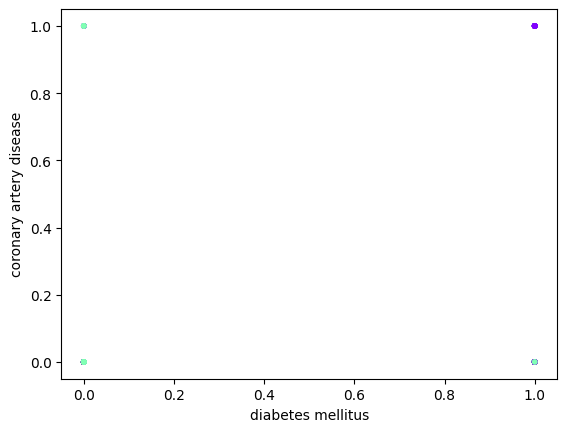

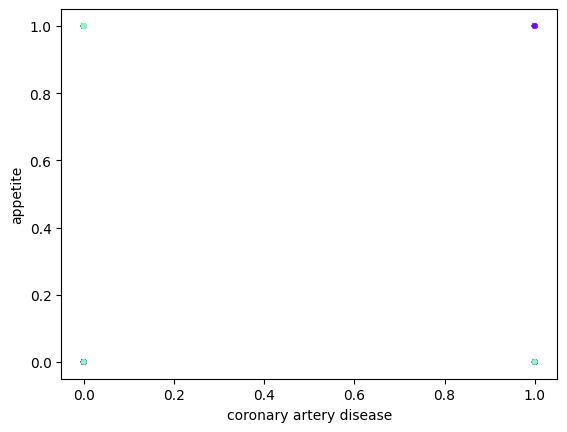

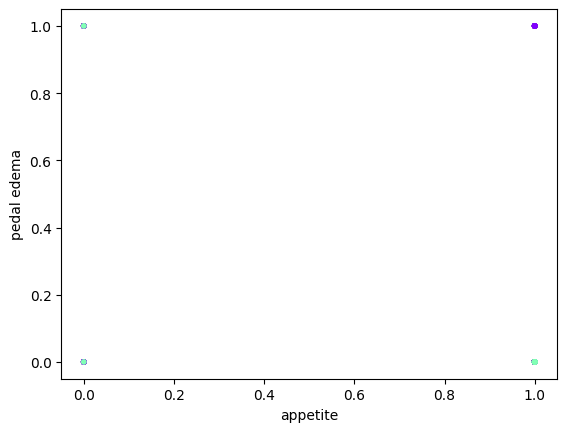

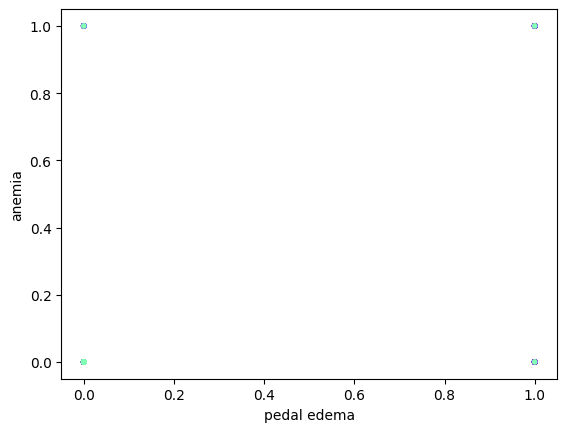

In [ ]:
i = 0
while features[i] != features[-1]:
  j = i+1
  plt.scatter(x[features[i]], x[features[j]], c=labels, s=10, cmap='rainbow')
  plt.xlabel(features[i])
  plt.ylabel(features[j])
  plt.show()
  print()
  i = i+1